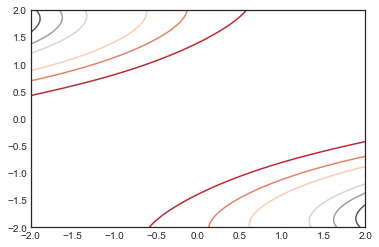

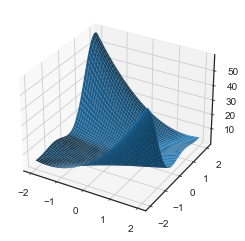

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

def f(x1, x2):
    return x1**2 + (x2**2) / 4.0 + 4 * (x1-x2)**2  * np.sin(x2)**2 

x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x1, x2)

Z = f(X, Y)

plt.contour(X, Y, Z, cmap='RdGy');

fig = plt.figure()
axes = fig.gca(projection ='3d')
axes.plot_surface(X, Y, Z)

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# input is numpy array
# it is splitted into X and Y
def f(XY):
    x1 = XY[0]
    x2 = XY[1]
    return x1**2 + (x2**2) / 4.0 + 4 * (x1-x2)**2  * np.sin(x2)**2

def gradientf(XY):
    x1 = XY[0]
    x2 = XY[1]
    gradXY = np.array([2 * x1 + 8 * (x1 - x2) * np.sin(x2)**2, 
                       x2/2 + (-8) * (x1 - x2) * np.sin(x2)**2 + 4 * (x1-x2)**2 * np.sin(2 * x2)])
    
    return gradXY

def Hessian(XY):
    x1 = XY[0]
    x2 = XY[1]
    hesMatrix = np.array([ [2 + 8 * np.sin(x2)**2,
                            (-8) * np.sin(x2)**2 +  8 * (x1 - x2) * 2 * np.sin(x2) * np.cos(x2)] ,
                           [(-8) * np.sin(x2)**2 +  8 * (x1 - x2) * 2 * np.sin(x2) * np.cos(x2), 
                            (1/2) + 8 * np.sin(x2)**2 + (-8) * (x1 - x2) * 2 * np.sin(x2) * np.cos(x2) + (-8) * (x1 - x2) * np.sin(2 * x2) + 4 * (x1-x2)**2 * 2*np.cos(2 * x2)] ])
    
    return hesMatrix


X0 = np.array([-2,8])

Gradient1 = gradientf(X0)

invHesMatrix = np.linalg.inv(Hessian(X0) )

ep = 10**-2

iter = 0

d=1    # Step Size

t=2/4  # Upper bound for RO

m=1/4  # Lower bound for RO


while np.linalg.norm(Gradient1) >= ep:

    if Gradient1.dot(Hessian(X0)).dot(Gradient1) <= 0:
        p0 = -d * Gradient1 / np.linalg.norm(Gradient1)
    else:
        ts = np.min([np.linalg.norm(Gradient1)**3 / (d * Gradient1.dot(Hessian(X0)).dot(Gradient1) ), 1])
        p0 = -d * ts * Gradient1 / np.linalg.norm(Gradient1)
        
    X1 = X0 + p0
    
    q = ( f(X0) - f(X1) ) / ( f(X0) - (f(X0) + p0.dot(Gradient1) + 1/2 * p0.dot(Hessian(X0)).dot(p0) ) )
    
    if q <= t:
        X0 = X0
        Gradient1 = gradientf(X0)
    else:
        X0 = X1
        Gradient1 = gradientf(X0)
        
    if q < m:
        d = 1/2 * d
    elif q > m and q < t:
        d = d
    elif q > t:
        d = 2 * d
        
    iter=iter+1

print('Min Point {0}, Gradient {1}: , Func Value: {2}, Iter: {3}'.format(X1, Gradient1, f(X1), iter))    

Min Point [-2.89511732e-03  9.41813546e+00], Gradient [-0.00911565 -0.00395471]: , Func Value: 22.19099166357598, Iter: 611


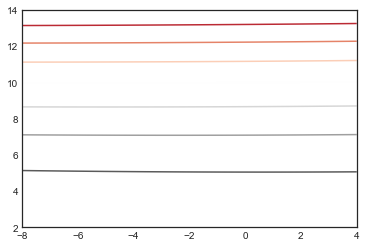

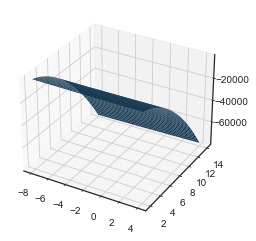

In [89]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

def m(p1, p2):
    return f([-2, 8]) + gradientf([-2, 8])[0] * p1 + gradientf([-2, 8])[1] * p2 + (1/2) * ( Hessian([-2, 8])[0,0] * p1**2 +  Hessian([-2, 8])[0,1] * p1 * p2 + Hessian([-2, 8])[1,0] * p1 * p2 + Hessian([-2, 8])[1,1] * p2**2)
     
x1 = np.linspace(-8, 4)
x2 = np.linspace(2, 14)

X, Y = np.meshgrid(x1, x2)

Z = m(X, Y)

plt.contour(X, Y, Z, cmap='RdGy');

fig = plt.figure()
axes = fig.gca(projection ='3d')
axes.plot_surface(X, Y, Z)


In [105]:
X0 = np.array([-2,8])

gradient = gradientf(X0)

invHesMatrix = np.linalg.inv(Hessian(X0) )

pk = invHesMatrix.dot(gradient)

print('Search Direction {0}'.format(pk) )

Search Direction [-8.19596479 -0.11412048]


In [123]:
X0 = np.array([-2,8])
X1 = X0 + pk

def m(p1, p2):
    return f([-2, 8]) + gradientf([-2, 8])[0] * float(p1) + gradientf([-2, 8])[1] * float(p2) + (1/2) * ( Hessian([-2, 8])[0,0] * float(p1)**2 +  Hessian([-2, 8])[0,1] * float(p1) * float(p2) + Hessian([-2, 8])[1,0] * float(p1) * float(p2) + Hessian([-2, 8])[1,1] * float(p2)**2)

Rk = ( f(X0) - f(X1) ) /  (m(0,0) - m(pk[0], pk[1]))

print('𝜌𝑘 {0}'.format(Rk) )

𝜌𝑘 0.9970125857955517
